In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f_list = []
# files_path = Path("./Sales_Data")
files = [file for file in os.listdir("./Sales_Data") if file.endswith(".csv")]
for file in files:
    df = pd.read_csv(f"./Sales_Data/{file}")
    df = df.dropna()
    f_list.append(df)
data = pd.concat(f_list, ignore_index=True)


In [3]:
data.drop(data[data['Order ID']=='Order ID'].index, inplace=True)

In [4]:
data['Order ID'] = data['Order ID'].astype(int)
data['Quantity Ordered'] = data['Quantity Ordered'].astype(int)
data['Price Each'] = data['Price Each'].astype(float)
data['Order Date'] = pd.to_datetime(data['Order Date'], format='mixed')

In [5]:
data['Sale'] = data['Quantity Ordered'] * data['Price Each']
data['Sale Month'] = data['Order Date'].dt.month
data['City'] = data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' '+ x.split(',')[2].split(' ')[1])

In [6]:
state_sale = data.groupby('City')['Sale'].sum(numeric_only=True).reset_index()

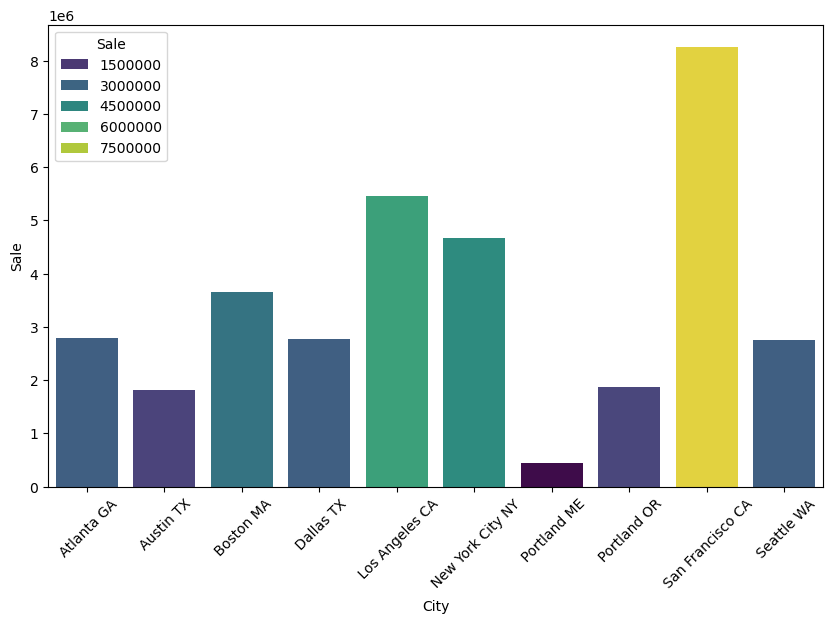

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(state_sale, x='City', y='Sale', hue='Sale', palette='viridis')
# ax.bar_label(ax.containers[0], fontsize= 10)
plt.xticks(rotation=45)
plt.show()

#### San Francisco (CA) is a city with highest sale in the country.

In [8]:
month_sale = data.groupby('Sale Month')['Sale'].sum().reset_index()

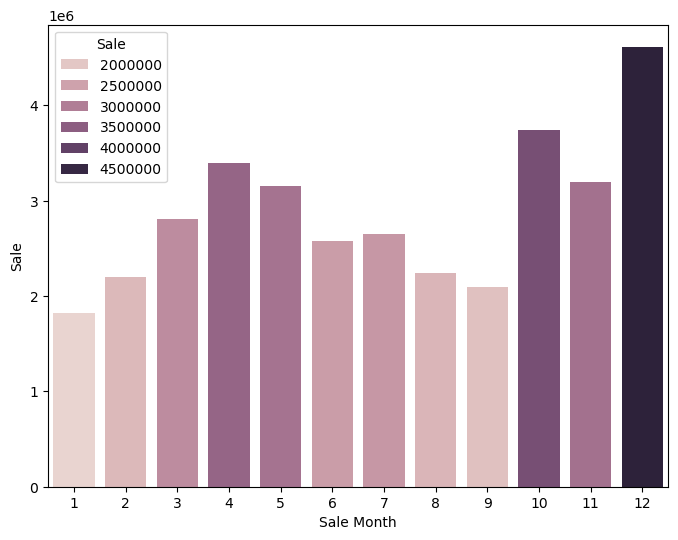

In [9]:
plt.figure(figsize=(8,6))
sns.barplot(month_sale, x='Sale Month', y='Sale', hue='Sale')
plt.show()

#### December has the highest sales for the store, likely driven by Christmas and New Year promotions.

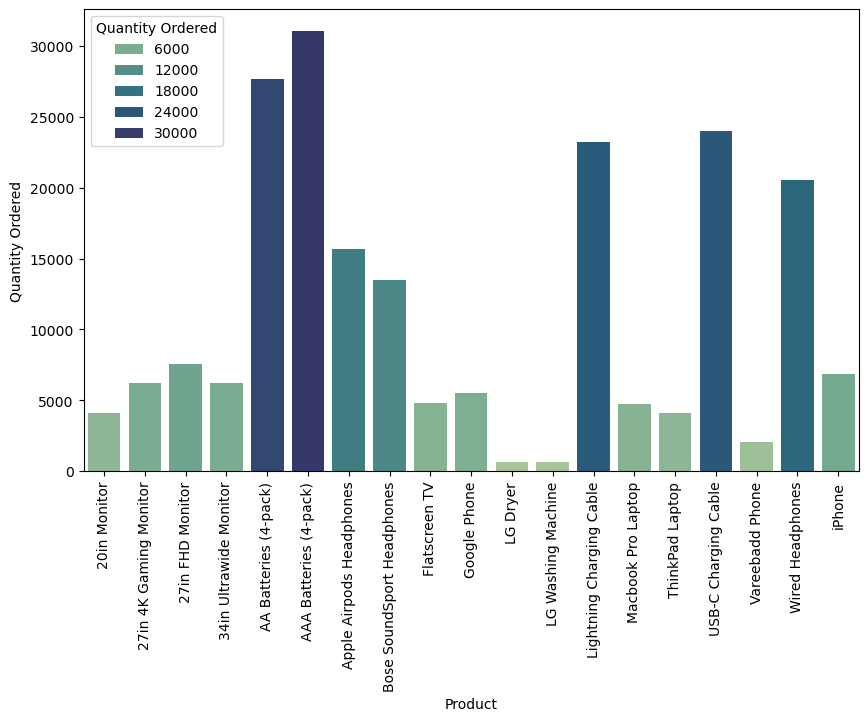

In [10]:
most_sale_product = data.groupby('Product')['Quantity Ordered'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(most_sale_product, x='Product', y='Quantity Ordered', hue='Quantity Ordered', palette='crest')
plt.xticks(rotation=90, fontsize=10)
plt.show()

#### The graph indicates that customers tend to purchase cheaper products more frequently than expensive and reliable ones.

In [11]:
data['Hour'] = data['Order Date'].dt.hour
hourly_order = data.groupby('Hour')['Quantity Ordered'].count().reset_index()

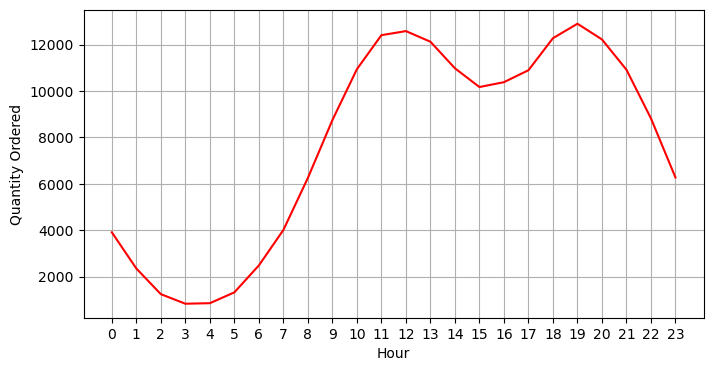

In [18]:
plt.figure(figsize=(8,4))
sns.lineplot(hourly_order, x= 'Hour' , y='Quantity Ordered', color='red')
plt.grid()
plt.xticks(range(0,24))
plt.show()

#### According to the graph, the optimal times for advertising are between 10–11 AM and 6–7 PM, as these periods see the highest number of customer orders.

In [13]:
grouped = data[data['Order ID'].duplicated(keep=False)]
grouped = grouped[['Order ID', 'Product']]

In [14]:
from collections import Counter

In [15]:
grouped_products = grouped.groupby('Order ID')['Product'].apply(frozenset)
product_group_count = Counter(grouped_products)
most_common_group = product_group_count.most_common(10)
most_common_group


[(frozenset({'Lightning Charging Cable', 'iPhone'}), 895),
 (frozenset({'Google Phone', 'USB-C Charging Cable'}), 869),
 (frozenset({'Wired Headphones', 'iPhone'}), 374),
 (frozenset({'USB-C Charging Cable', 'Vareebadd Phone'}), 318),
 (frozenset({'Google Phone', 'Wired Headphones'}), 311),
 (frozenset({'Apple Airpods Headphones', 'iPhone'}), 299),
 (frozenset({'Bose SoundSport Headphones', 'Google Phone'}), 169),
 (frozenset({'Vareebadd Phone', 'Wired Headphones'}), 110),
 (frozenset({'AA Batteries (4-pack)', 'Lightning Charging Cable'}), 103),
 (frozenset({'Lightning Charging Cable', 'USB-C Charging Cable'}), 96)]

#### The results reveal some of the most common product pairings. By suggesting complementary items when a customer selects a product, we can enhance sales and improve the shopping experience.